In [1]:
import json
import numpy as np
import cs_vqe_classes.cs_vqe_circuit as cs_circ
import utils.plotting_tools as plot
import utils.qonversion_tools as qonvert
import utils.linalg_tools as la
from utils.molecule_tools import get_molecule
from utils.cs_vqe_tools import greedy_dfs
from matplotlib import pyplot as plt
from qat.interop.qiskit import qiskit_to_qlm
from qiskit.aqua.components.optimizers import IMFIL, NELDER_MEAD

/home/ucaptwe/anaconda3/lib/python3.8/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
/home/ucaptwe/anaconda3/lib/python3.8/site-packages/qiskit/aqua/components/optimizers/optimizer.py:49: DeprecationWarning: The package qiskit.aqua.components.optimizers is deprecated. It was moved/refactored to qiskit.algorithms.optimizers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua.components.optimizers',


In [2]:
with open('data/model_data.json', 'r') as json_file:
    model_data = json.load(json_file)
    
model_data.keys()

dict_keys(['H2_3-21G_SINGLET', 'H6_STO-3G_SINGLET', 'H2_6-31G_SINGLET', 'H2_6-311G_SINGLET', 'H3+_STO-3G_SINGLET', 'H3+_3-21G_SINGLET', 'H3+_STO-3G_SINGLET_alt', 'HeH+_3-21G_SINGLET', 'HeH+_3-21G_SINGLET_alt', 'HeH+_6-311G_SINGLET', 'H2O_STO-3G_SINGLET', 'H2O_STO-3G_SINGLET_alt', 'BeH+_STO-3G_SINGLET', 'LiH_STO-3G_SINGLET', 'CH+_STO-3G_SINGLET', 'HF_STO-3G_SINGLET', 'B+_STO-3G_SINGLET', 'N+_STO-3G_SINGLET', 'OH+_STO-3G_SINGLET', 'CH2_STO-3G_SINGLET', 'BeH2_STO-3G_SINGLET', 'Be_STO-3G_SINGLET', 'C_STO-3G_SINGLET', 'NH_STO-3G_SINGLET', 'F+_STO-3G_SINGLET', 'Li+_STO-3G_SINGLET', 'BH_STO-3G_SINGLET', 'NeH+_STO-3G_SINGLET', 'NH2+_STO-3G_SINGLET', 'BH2+_STO-3G_SINGLET'])

In [10]:
speciesname = "BeH+_STO-3G_SINGLET"
molecule    = model_data[speciesname]

ham         = molecule['ham']
uccsd       = molecule['uccsd']
hf_config   = molecule['hf_config']
num_qubits  = molecule['num_qubits']
terms_noncon= molecule['terms_noncon']
num_tapered = molecule['num_tapered']
print(num_tapered+num_qubits, num_qubits)

16 8


BeH+_STO-3G_SINGLET reaches chemical accuracy for 6-qubit CS-VQE


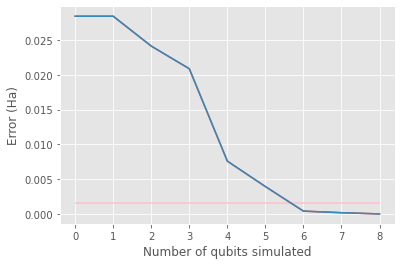

In [11]:
mol_circ = cs_circ.cs_vqe_circuit(hamiltonian = ham,
                                  terms_noncon= terms_noncon,
                                  num_qubits  = num_qubits,
                                  hf_config   = hf_config)

num_sim_q = mol_circ.chem_acc_num_q
print('%s reaches chemical accuracy for %i-qubit CS-VQE' % (speciesname, num_sim_q))
mol_circ.plot_cs_vqe_errors()

In [5]:
anz_ops = mol_circ.sufficient_anz_terms(uccsd)

Testing operator 1/900
Testing operator 2/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...


/home/ucaptwe/anaconda3/lib/python3.8/site-packages/qiskit/circuit/quantumcircuit.py:942: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)


Testing operator 3/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 4/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 5/900
Testing operator 6/900
Testing operator 7/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 8/900
Testing operator 9/900
Testing operator 10/900
Testing operator 11/900
Testing operator 12/900
Testing operator 13/900
Testing operator 14/900
Testing operator 15/900
Testing operator 16/900
Testing operator 17/900
Testing operator 18/900
Testing operator 19/900
Testing operator 20/900
Testing operator 21/900
Testing operator 22/900
Testing operator 23/900
Testing operator 24/900
Testing operator 25/900
Testing operator 26/900
Testing operator 27/900
Testing operator 28/900
Testing operator 29/900
Testing operator 30/900
Testing operator 31/900
Testing operator 32/900
Testing operator 33/900
Testing operator 34/900
Testing operat

Testing operator 257/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 258/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 259/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 260/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 261/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 262/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 263/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 264/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 265/900
Testing operator 266/900
Testing operator 267/900
Testing operator 268/900
Testing operator 269/900
Testing operator 270/900
Testing operator 271/900
Testing operator 272/900


Testing operator 389/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 390/900
Testing operator 391/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 392/900
Testing operator 393/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 394/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 395/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 396/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 397/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 398/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 399/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 400/900
*   Performing 7-qubit CS

Testing operator 574/900
Testing operator 575/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 576/900
Testing operator 577/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 578/900
Testing operator 579/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 580/900
Testing operator 581/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 582/900
Testing operator 583/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 584/900
Testing operator 585/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 586/900
Testing operator 587/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 588/900
Testing operator 589/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...


Testing operator 703/900
Testing operator 704/900
Testing operator 705/900
Testing operator 706/900
Testing operator 707/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 708/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 709/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 710/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 711/900
Testing operator 712/900
Testing operator 713/900
Testing operator 714/900
Testing operator 715/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 716/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 717/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 718/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...


Testing operator 836/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 837/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 838/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 839/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 840/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 841/900
Testing operator 842/900
Testing operator 843/900
Testing operator 844/900
Testing operator 845/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 846/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 847/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 848/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...


Testing operator 281/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 282/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 285/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 286/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 290/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 291/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 293/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 296/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 297/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 298/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...


Testing operator 528/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 530/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 536/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 540/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 542/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 546/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 548/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 550/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 552/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 554/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...


Testing operator 694/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 696/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 697/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 699/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 702/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 707/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 708/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 709/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 710/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 715/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...


Testing operator 856/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 861/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 862/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 863/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 864/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 869/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 870/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 871/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 872/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 877/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...


Testing operator 319/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 321/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 322/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 323/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 324/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 325/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 326/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 327/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 328/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 337/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...


Testing operator 573/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 575/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 577/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 579/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 581/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 583/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 585/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 587/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 589/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 591/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...


Testing operator 734/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 739/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 740/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 741/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 744/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 749/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 750/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 751/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 752/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 754/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...


Testing operator 896/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
['XXIIIIIXII', 'XIIYZZXXZI', 'IIXXIIIIXY']
------------------------------------------------------------
Error with 3 operator(s) in Ansatz =  0.028902065883869454
------------------------------------------------------------
Testing operator 2/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 3/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 4/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 7/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 209/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 210/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 213/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4,

Testing operator 356/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 357/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 358/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 359/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 360/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 369/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 370/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 371/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 372/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 373/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...


Testing operator 614/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 616/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 618/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 620/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 622/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 624/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 625/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 629/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 631/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 633/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...


Testing operator 782/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 783/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 784/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 785/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 786/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 787/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 788/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 797/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 798/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 799/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...


Testing operator 232/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 241/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 244/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 246/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 247/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 250/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 251/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 253/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 256/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 257/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...


Testing operator 399/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 400/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 401/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 404/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 406/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 407/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 413/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 414/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 415/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...
Testing operator 416/900
*   Performing 7-qubit CS-VQE over qubit positions 8, 6, 4, 3, 2, 1, 0 ...


KeyboardInterrupt: 

In [12]:
#anz_ops = ['XIZXX', 'IYZXX'] #for B+ 
#anz_ops = ['YXIIXXII', 'IXIIZZZY', 'XYIIZZXX', 'YYIIXYII'] #for HF

anz=uccsd
#anz = {op:uccsd[op] for op in anz_ops}
anz_red = mol_circ.project_anz_terms_alt(anz_terms=anz, num_sim_q = num_sim_q)
ham_red = mol_circ.ham_reduced[num_sim_q]
qc = mol_circ.build_circuit(anz, num_sim_q)
init_params = mol_circ.init_param
print(ham_red)
print('Number of circuit parameters:', qc.num_parameters, '\n')


{'IIIIII': -12.569640952320905, 'ZIIIII': -0.6064934508920155, 'IZIZII': 0.6064934508870996, 'ZZIZII': -0.14110689972918863, 'IZZIII': 0.8560463078989908, 'ZZZIII': -0.1805169870176192, 'IIZZII': 0.18051698701761917, 'IIZIII': -0.8560463078989923, 'ZIZIII': 0.18051698701761917, 'IZZZII': -0.1805169870176192, 'IZIIII': -0.3892355930337418, 'ZZIIII': -0.07173353440006972, 'IIIZII': -0.07173353440885312, 'ZZIIZI': 0.3701576287815048, 'IZIIZI': -0.07586880499523323, 'ZIIZZI': 0.08763436763378361, 'ZIZIZI': 0.18660044939197512, 'IIZIZI': 0.17430556288256216, 'ZZZIZI': -0.18660044939197512, 'IZZIZI': -0.17430556288256216, 'ZIIIZI': 0.10163512195205718, 'IIIIZI': -0.23105089058903652, 'IIIZIZ': 0.37015762881577857, 'ZIIZIZ': -0.08763436764432217, 'IZIIIZ': 0.07586880501068816, 'IZZZIZ': 0.18660044940983692, 'IIZIIZ': 0.17430556288256213, 'IIZZIZ': -0.18660044940983697, 'IZZIIZ': -0.1743055628825622, 'IZIZIZ': -0.10163512195205718, 'IIIIIZ': -0.23105089059289668, 'ZZIZZZ': 0.1172854376102335, 

# Performing the simulation *without* noise

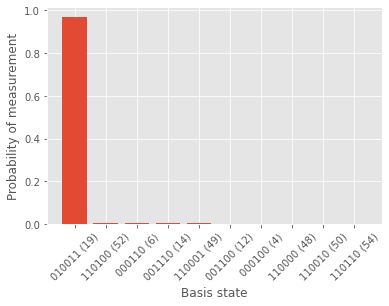

*   Performing 6-qubit CS-VQE over qubit positions 7, 5, 4, 2, 1, 0 ...


KeyboardInterrupt: 

In [13]:
cs_vqe_results = mol_circ.CS_VQE(anz_terms=anz, 
                                 num_sim_q=num_sim_q, 
                                 optimizer=IMFIL(maxiter=10000), 
                                 param_bound=np.pi,
                                 noise=False,
                                show_amps=True)

title = '%s: %i-qubit CS-VQE simulation' % (speciesname, num_sim_q)
fig = plot.plot_parameter_settings(cs_vqe_results, title=title)

In [35]:
list(zip(*list(cs_vqe_results['params'].values())))[0]

(-0.017038195424997404,
 -2.9679991797593175e-10,
 0.0012872110742754295,
 0.0,
 0.017038195424997404)

In [14]:
qc_qlm = qiskit_to_qlm(qc)

In [15]:
instructions=[]
param_num=0
for gate, var, q_pos in list(qc_qlm.iterate_simple()):
    if var!=[]:
        var=[param_num%num_sim_q]
        param_num += 1
    instructions.append((gate, var, q_pos))

In [16]:
qc_qlm_dict = {'hamiltonian':ham_red,
                'num_qubits':qc_qlm.nbqbits,
               'num_params':qc.num_parameters,
               'instructions':instructions}

In [17]:
qc_qlm_dict

{'hamiltonian': {'IIIIII': -12.569640952320905,
  'ZIIIII': -0.6064934508920155,
  'IZIZII': 0.6064934508870996,
  'ZZIZII': -0.14110689972918863,
  'IZZIII': 0.8560463078989908,
  'ZZZIII': -0.1805169870176192,
  'IIZZII': 0.18051698701761917,
  'IIZIII': -0.8560463078989923,
  'ZIZIII': 0.18051698701761917,
  'IZZZII': -0.1805169870176192,
  'IZIIII': -0.3892355930337418,
  'ZZIIII': -0.07173353440006972,
  'IIIZII': -0.07173353440885312,
  'ZZIIZI': 0.3701576287815048,
  'IZIIZI': -0.07586880499523323,
  'ZIIZZI': 0.08763436763378361,
  'ZIZIZI': 0.18660044939197512,
  'IIZIZI': 0.17430556288256216,
  'ZZZIZI': -0.18660044939197512,
  'IZZIZI': -0.17430556288256216,
  'ZIIIZI': 0.10163512195205718,
  'IIIIZI': -0.23105089058903652,
  'IIIZIZ': 0.37015762881577857,
  'ZIIZIZ': -0.08763436764432217,
  'IZIIIZ': 0.07586880501068816,
  'IZZZIZ': 0.18660044940983692,
  'IIZIIZ': 0.17430556288256213,
  'IIZZIZ': -0.18660044940983697,
  'IZZIIZ': -0.1743055628825622,
  'IZIZIZ': -0.1016351

In [18]:
import json 
 
with open("data/QLM_circuits/BeH+_UCCSD.json", "w") as outfile: 
    json.dump(qc_qlm_dict, outfile)